## Original Strategy

Link: https://www.quantifiedstrategies.com/turnaround-tuesday/

### Original Graph

![Original Graph of Turnaround Tuesday Trading Strategy](Turnaround_Tuesday_Strategy.png)

### Original Stats

| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 2191836.00    |
| Net Profit                      | 2091836.00    |
| Net Profit %                    | 2091.84%      |
| Exposure %                      | 24.17%        |
| Net Risk Adjusted Return        | 8655.21%      |
| Annual Return %                 | 10.68%         |
| Risk Adjusted Return %          | 44.18%        |
| Transaction Costs               | 0.00          |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 639           |
| Avg. Profit/Loss                | 3273.61       |
| Avg. Profit/Loss %              | 0.51%         |
| Avg. Bars Held                  | 3.90          |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 4145191.68    |
| Avg. Profit                     | 8914.39      |
| Avg. Profit %                   | 1.37%         |
| Avg. Bars Held                  | 3.32          |
| Max. Consecutive Wins           | 16            |
| Largest Win                     | 105213.24      |
| Bars in Largest Win             | 2             |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      |  -2053355.51  |
| Avg. Loss                       |  -11800.89    |
| Avg. Loss %                     |  -1.79%       |
| Avg. Bars Held                  |  5.45         |
| Max. Consecutive Losses         |  3            |
| Largest Loss                    |  -97804.22    |
| Bars in Largest Loss            |  6            |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | -147756.67    |
| Max. Trade % Drawdown           | -15.49       |
| Max. System Drawdown            | -159667.70    |
| Max. System % Drawdown          | -23.69%       |
| Recovery Factor                 | 13.10          |
| CAR/MaxDD                       | 0.45          |
| RAR/MaxDD                       | 1.86          |
| Profit Factor                   | 2.02          |
| Payoff Ratio                    | 0.76         |
| Standard Error                  | 154702.68      |
| Risk-Reward Ratio               | 0.34          |

## My Recreation of Strategy

### Imports

In [1]:
import sys
from datetime import datetime

new_path = "../"
if new_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(new_path)

import matplotlib.pyplot as plt
import backtrader as bt
import backtrader.analyzers as btanalyzers
import pandas as pd
import numpy as np

from analyzers import InMarketAnalyzer, CashValueAnalyzer, SortinoRatio
from strategies import StrategyBase
from utils import print_strategy_stats


### Strategy Implimentation

In [4]:
class TurnaroundTuesday(StrategyBase):
    def __init__(self):
        super().__init__()
        self.days_since_entry = 0

    @staticmethod
    def get_optimization_args(
        **kwargs,
    ) -> tuple[dict[str, list], dict[str, int]]:

        return {}, {}

    def long_condition(self):
        # this function is only called without a position
        # so reset days since entry
        self.days_since_entry = 0
        if self.data.datetime.date().weekday() == 0:
            # Check if close is lower
            if self.datas[0].close[0] < self.datas[0].close[-1]:
                return True
        return False

    def close_condition(self):
        """
        Determines if the current conditions meet the criteria to close
        an open position.

        This method checks if the current day of the week is Tuesday
        (weekday == 1), and if there is an open position. If both conditions
        are satisfied, it signals to exit the position at the close of
        Tuesday's trading session.

        Returns:
            bool: True if the position should be closed, False otherwise.
        """
        # Function is only called when we have position
        # so increment days since entry
        self.days_since_entry += 1
        if self.days_since_entry == 5 or self.datas[0].close[0] > self.datas[0].high[-1]:
            # Exit position after 5 trading days
            return True
        return False


### Backtesting

#### COO: False, COC: False

In [18]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(TurnaroundTuesday)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-03-02, Buy Order Margin
1993-03-23, Buy Order Margin
1993-04-20, BUY EXECUTED, 25.146894
1993-04-27, SELL EXECUTED, 24.390733
1993-06-08, BUY EXECUTED, 25.322749
1993-06-14, SELL EXECUTED, 25.410658
1993-06-15, Buy Order Margin
1993-07-13, Buy Order Margin
1993-07-20, BUY EXECUTED, 25.325113
1993-07-21, SELL EXECUTED, 25.378254
1993-08-24, Buy Order Margin
1993-09-21, Buy Order Margin
1993-10-19, BUY EXECUTED, 26.730332
1993-10-26, SELL EXECUTED, 26.498663
1993-11-16, Buy Order Margin
1993-11-23, Buy Order Margin
1993-11-30, BUY EXECUTED, 26.391741
1993-12-06, SELL EXECUTED, 26.676871
1994-01-04, Buy Order Margin
1994-01-25, Buy Order Margin
1994-03-22, BUY EXECUTED, 27.050502
1994-03-23, SELL EXECUTED, 27.104662
1994-04-05, Buy Order Margin
1994-04-19, BUY EXECUTED, 25.552710
1994-04-22, SELL EXECUTED, 25.994834
1994-05-10, Buy Order Margin
1994-05-24, Buy Order Margin
1994-06-07, BUY EXECUTED, 26.644488
1994-06-13, SELL EXECUTED, 26.590333
199

In [19]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 230503.19      |
| Net Profit                      | 130503.19 |
| Net Profit %                    | 83.51%    |
| Exposure %                      | 9.26%           |
| Net Risk Adjusted Return        | 29.09%      |
| Annual Return %                 | 2.69%   |
| Risk Adjusted Return %          | 29.09%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 229            |
| Avg. Profit/Loss                | 0.57                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |      


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 230503.19      |
| Net Profit                      | 130503.19 |
| Net Profit %                    | 83.51%    |
| Exposure %                      | 9.26%           |
| Net Risk Adjusted Return        | 29.09%      |
| Annual Return %                 | 2.69%   |
| Risk Adjusted Return %          | 29.09%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 229            |
| Avg. Profit/Loss                | 0.57                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 309327.52         |
| Avg. Profit                     | 1863.42     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 13      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -178824.33        |
| Avg. Loss                       | -2838.48    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 3     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 27442.15     |
| Max. System % Drawdown          | 14.10% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 1.7297843146553968                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



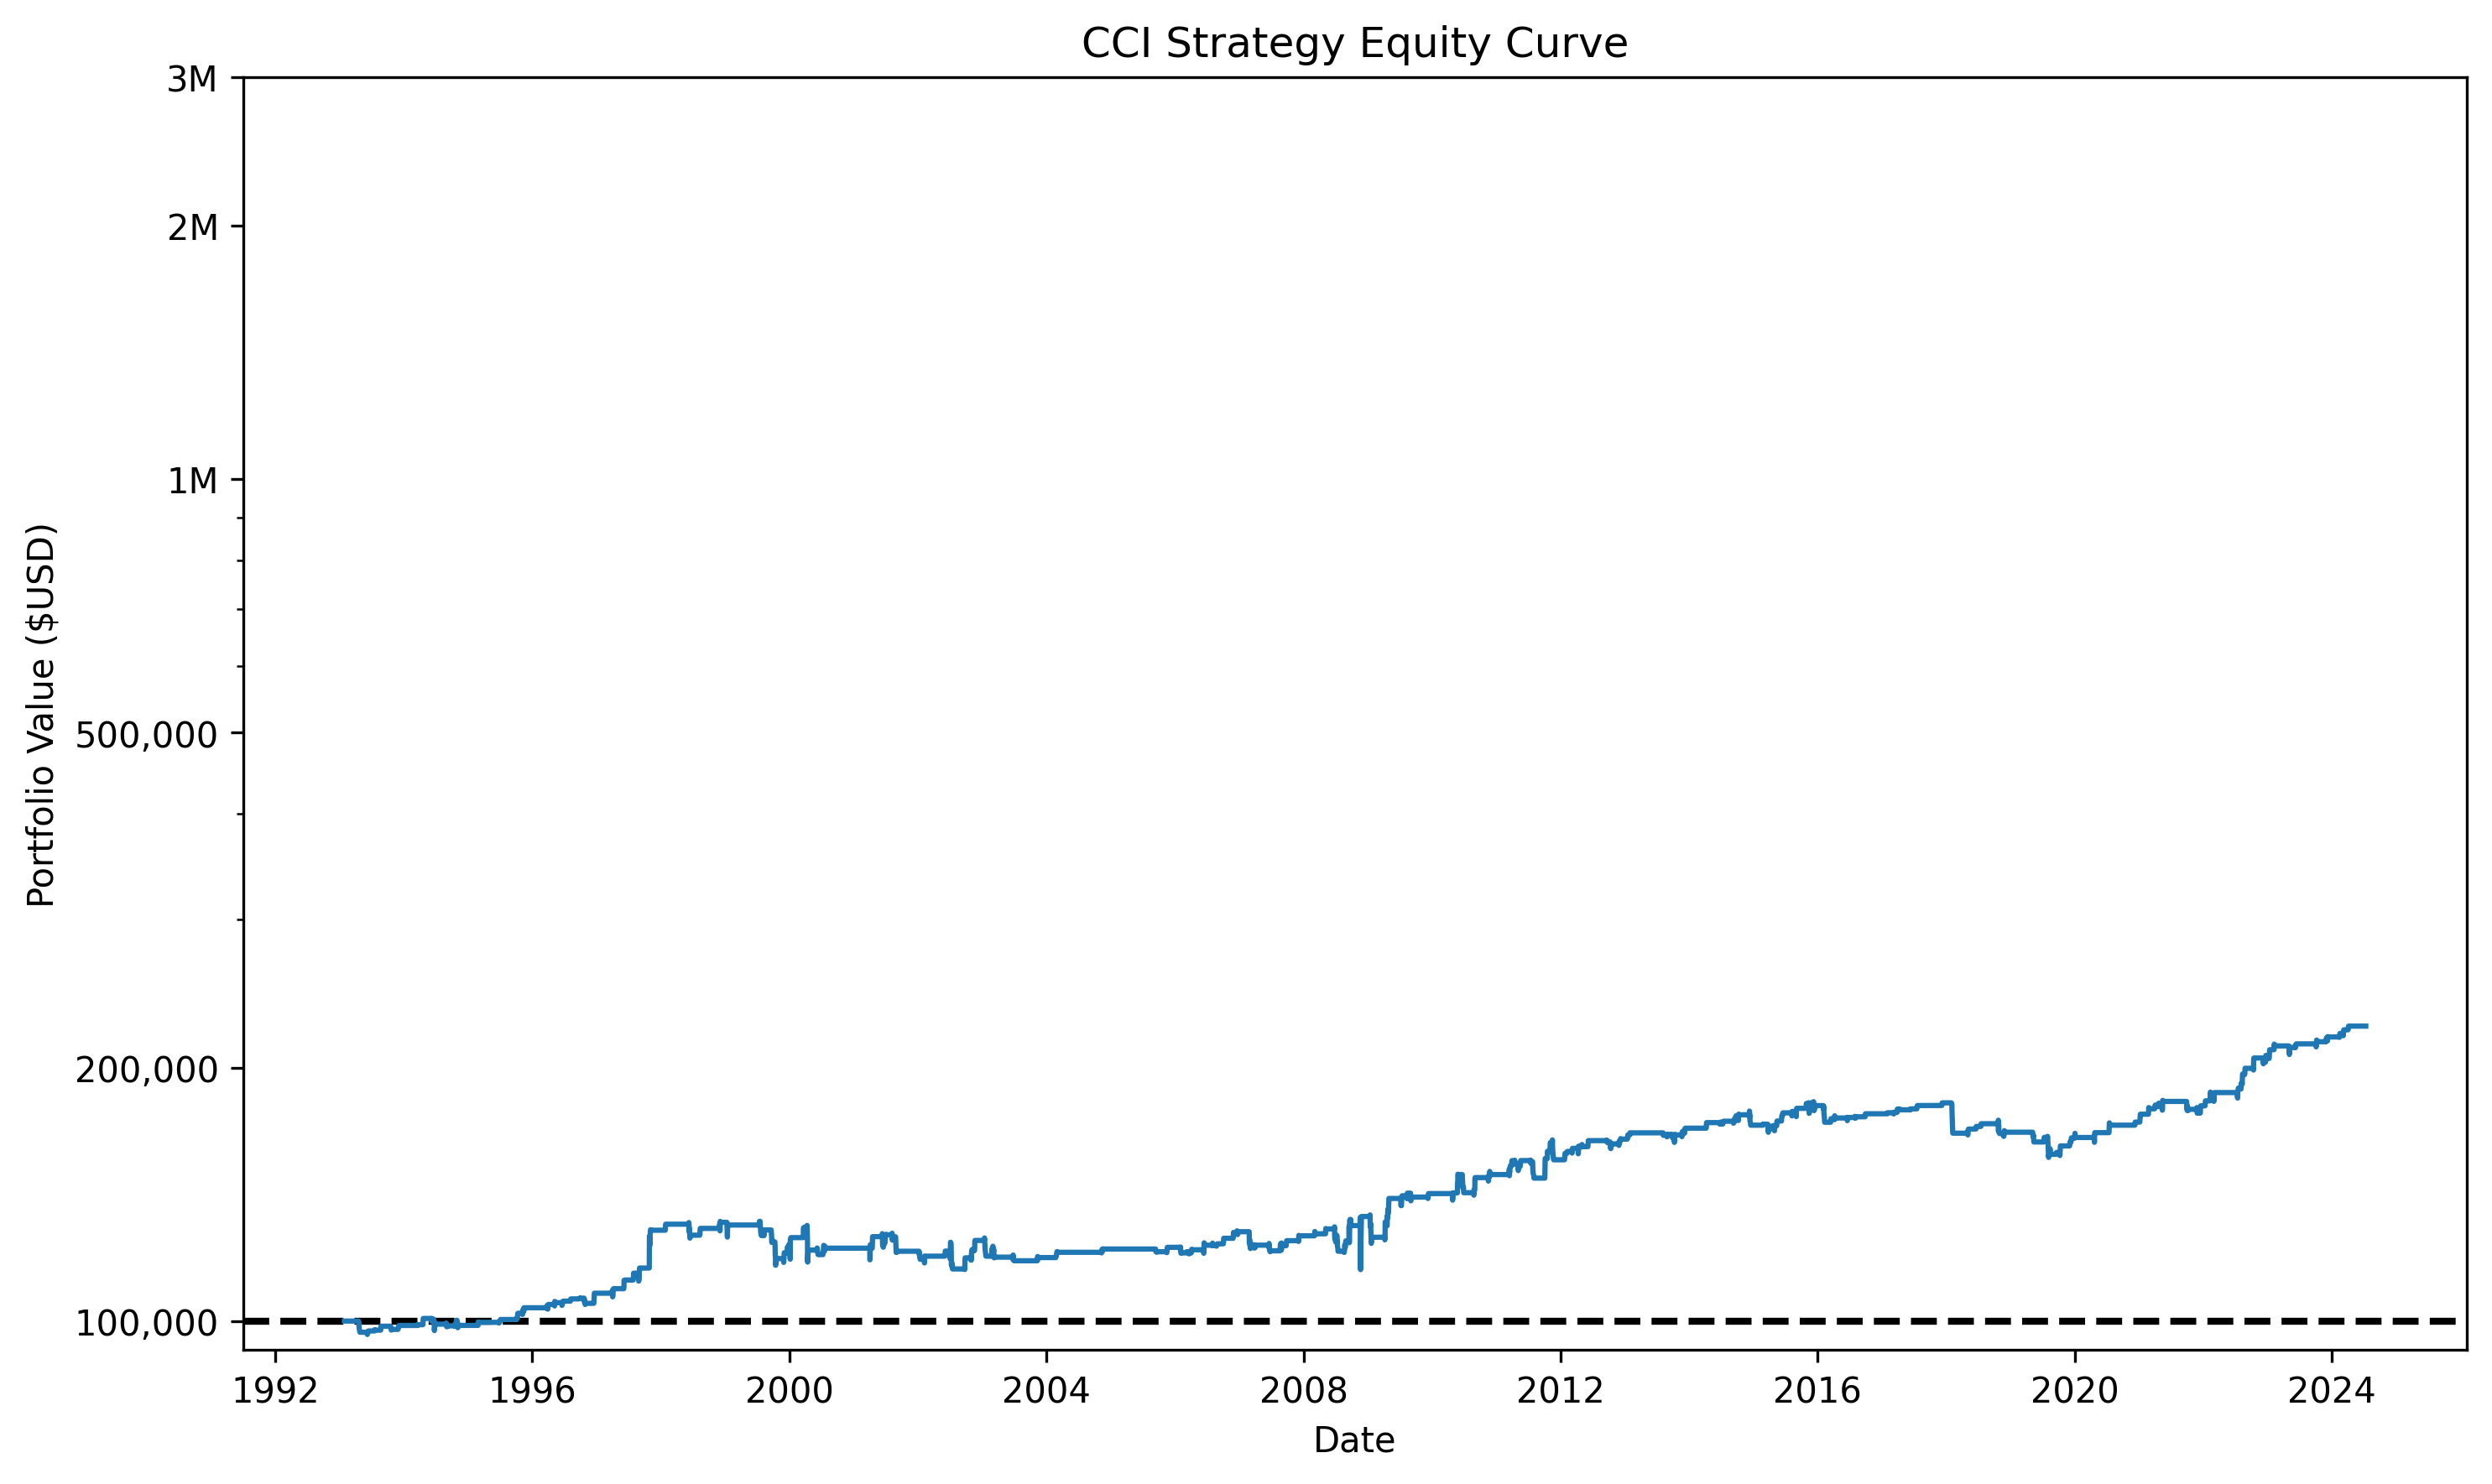

In [7]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"CCI Strategy Equity Curve")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()

#### COO: True

In [16]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=True)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(TurnaroundTuesday)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-03-02, BUY EXECUTED, 24.818655
1993-03-03, SELL EXECUTED, 25.203711
1993-03-23, BUY EXECUTED, 25.269983
1993-03-26, SELL EXECUTED, 25.393084
1993-04-20, BUY EXECUTED, 25.146894
1993-04-27, SELL EXECUTED, 24.390733
1993-06-08, BUY EXECUTED, 25.322749
1993-06-14, SELL EXECUTED, 25.410658
1993-06-15, BUY EXECUTED, 25.375511
1993-06-18, SELL EXECUTED, 25.413665
1993-07-13, BUY EXECUTED, 25.484499
1993-07-20, SELL EXECUTED, 25.325113
1993-08-24, BUY EXECUTED, 25.909544
1993-08-25, SELL EXECUTED, 26.192900
1993-09-21, BUY EXECUTED, 25.946225
1993-09-23, SELL EXECUTED, 26.106627
1993-10-19, BUY EXECUTED, 26.730332
1993-10-26, SELL EXECUTED, 26.498663
1993-11-16, BUY EXECUTED, 26.605572
1993-11-17, SELL EXECUTED, 26.694691
1993-11-23, BUY EXECUTED, 26.391747
1993-11-24, SELL EXECUTED, 26.463023
1993-11-30, BUY EXECUTED, 26.391741
1993-12-06, SELL EXECUTED, 26.676871
1994-01-04, BUY EXECUTED, 26.715951
1994-01-05, SELL EXECUTED, 26.823599
1994-01-25, BUY

In [17]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1001292.99      |
| Net Profit                      | 901292.99 |
| Net Profit %                    | 230.39%    |
| Exposure %                      | 20.48%           |
| Net Risk Adjusted Return        | 37.14%      |
| Annual Return %                 | 7.61%   |
| Risk Adjusted Return %          | 37.14%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 568            |
| Avg. Profit/Loss                | 1.59                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |   


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1001292.99      |
| Net Profit                      | 901292.99 |
| Net Profit %                    | 230.39%    |
| Exposure %                      | 20.48%           |
| Net Risk Adjusted Return        | 37.14%      |
| Annual Return %                 | 7.61%   |
| Risk Adjusted Return %          | 37.14%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 568            |
| Avg. Profit/Loss                | 1.59                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 2169790.13         |
| Avg. Profit                     | 5357.51     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 15      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -1268497.14        |
| Avg. Loss                       | -7782.19    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 4     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 188462.83     |
| Max. System % Drawdown          | 20.77% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 1.710520312708281                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



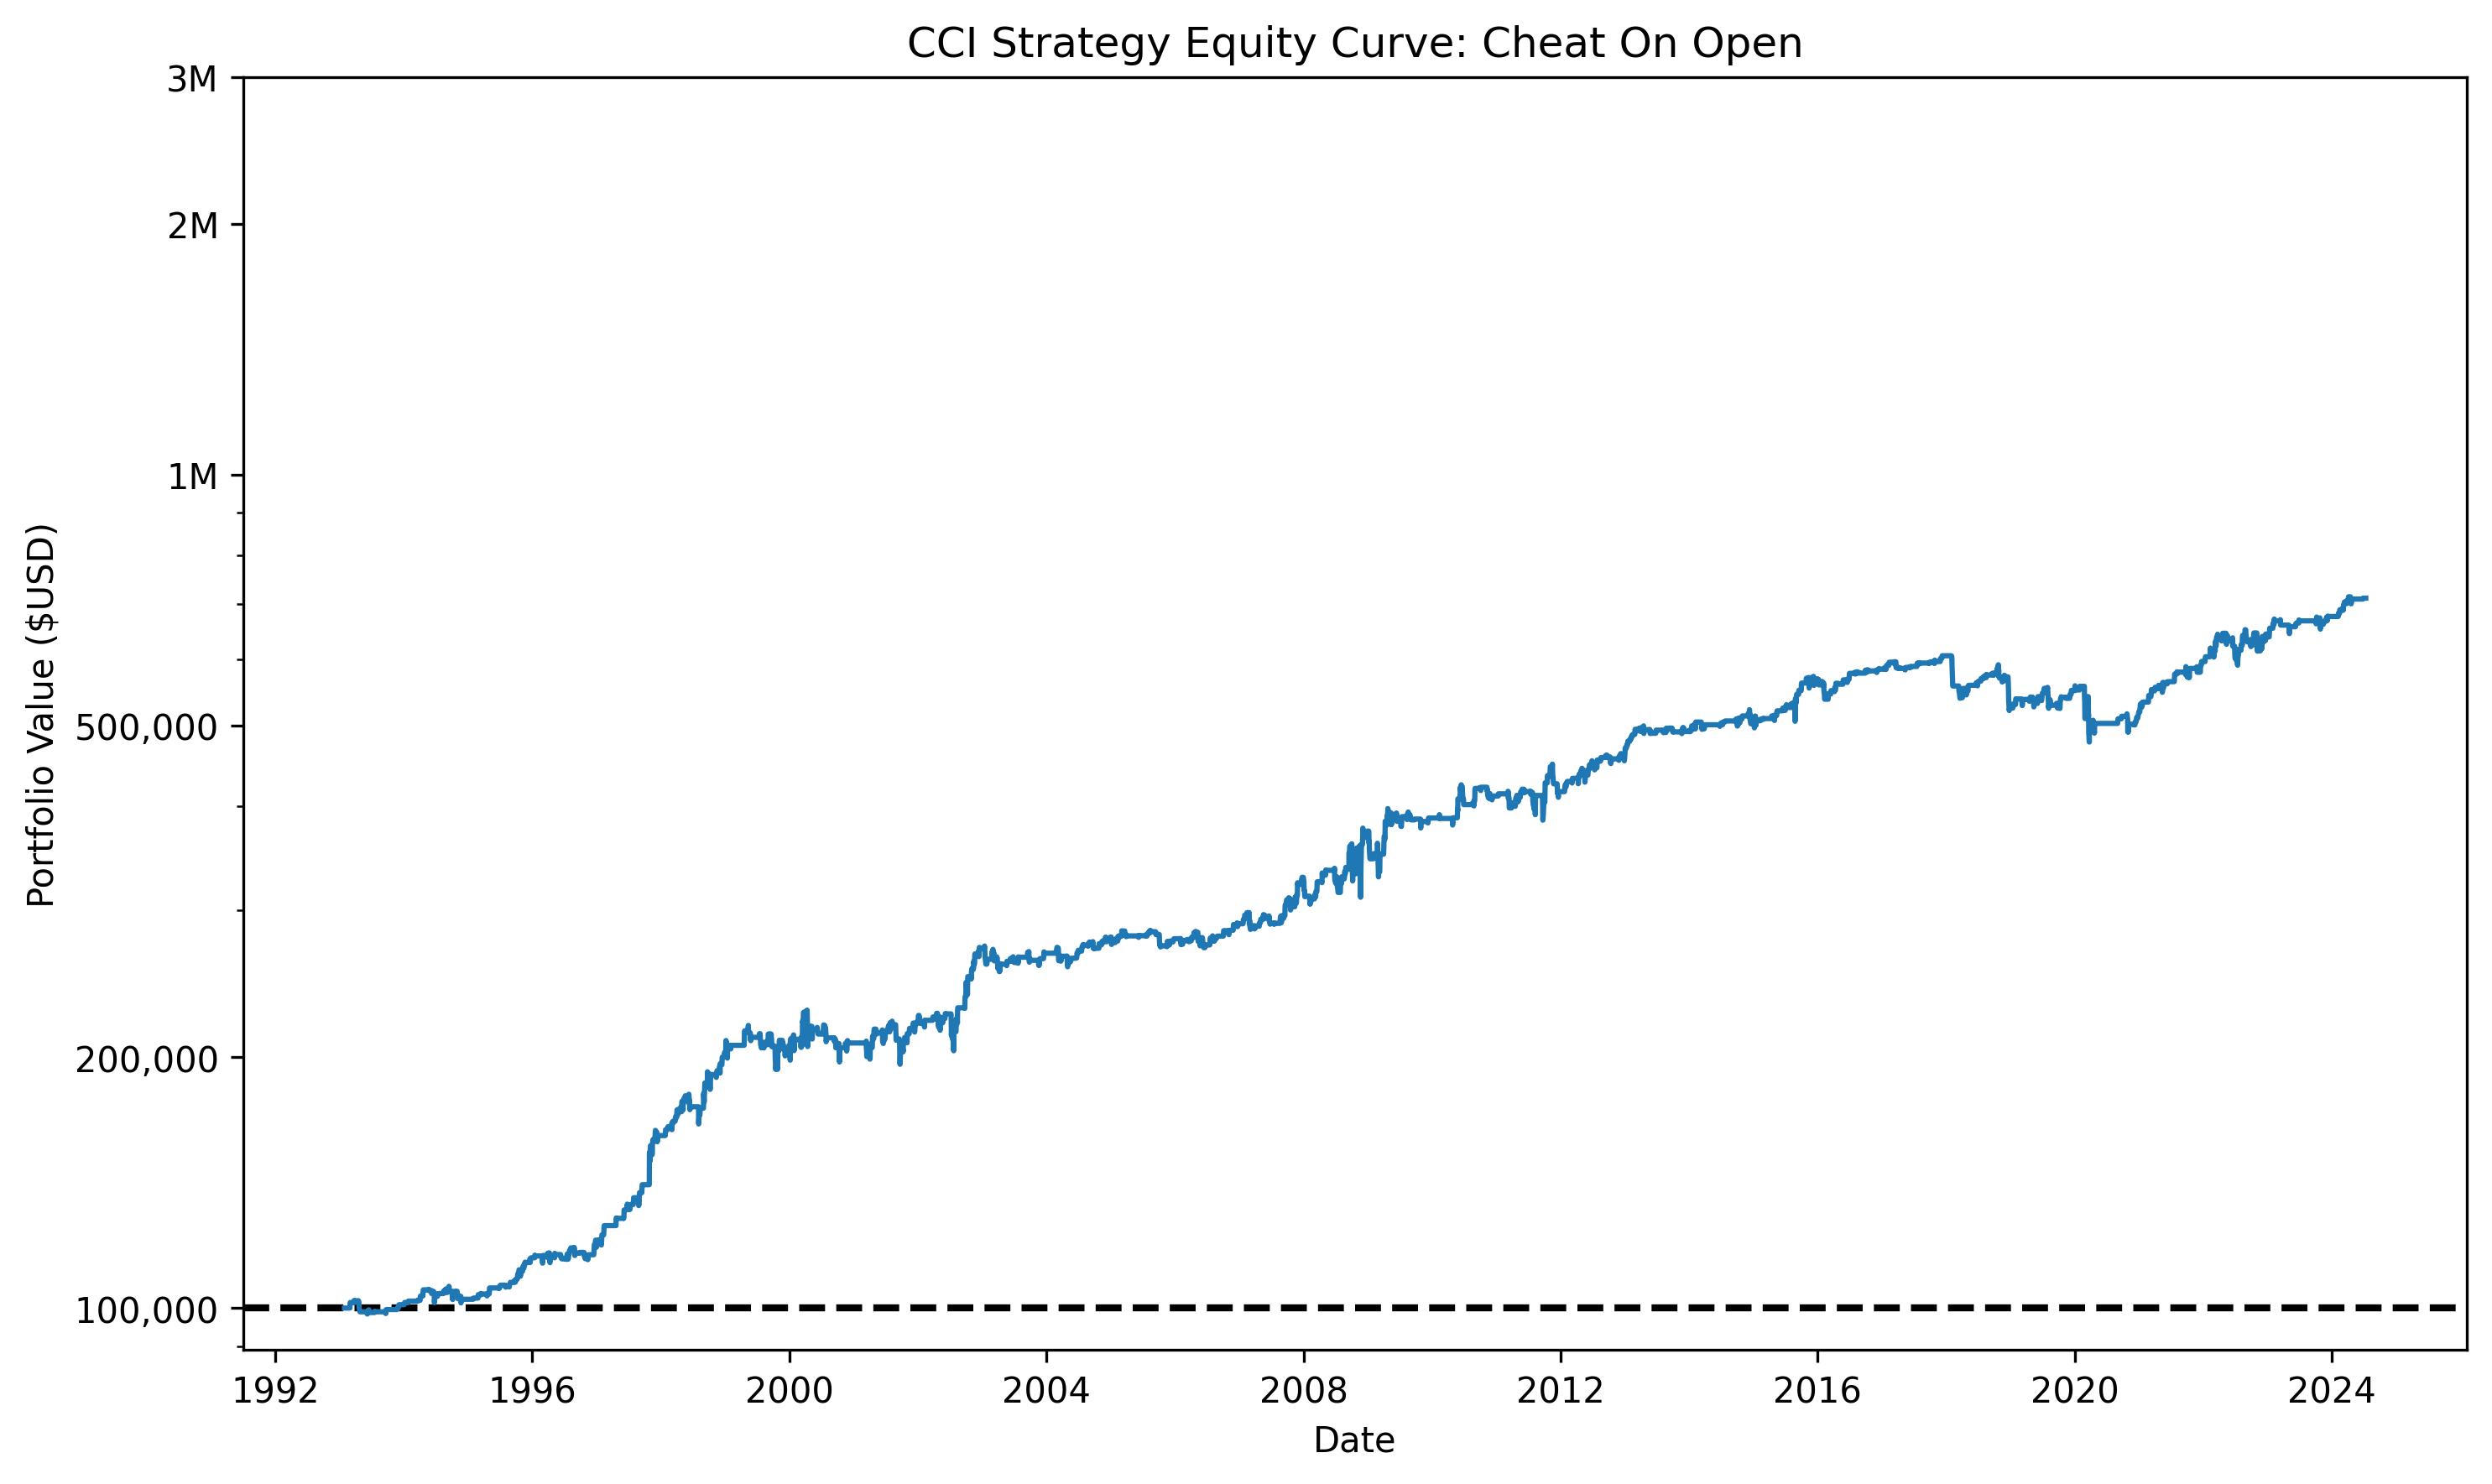

In [10]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"CCI Strategy Equity Curve: Cheat On Open")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()

#### COC: True

In [14]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(TurnaroundTuesday)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(True)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-03-02, BUY EXECUTED, 24.801138
1993-03-03, SELL EXECUTED, 25.168707
1993-03-23, BUY EXECUTED, 25.199646
1993-03-26, SELL EXECUTED, 25.410673
1993-04-20, BUY EXECUTED, 25.182058
1993-04-27, SELL EXECUTED, 24.425894
1993-06-08, BUY EXECUTED, 25.393085
1993-06-14, SELL EXECUTED, 25.375496
1993-06-15, BUY EXECUTED, 25.340317
1993-06-18, SELL EXECUTED, 25.428253
1993-07-13, BUY EXECUTED, 25.466795
1993-07-20, SELL EXECUTED, 25.342821
1993-08-24, BUY EXECUTED, 25.909525
1993-08-25, SELL EXECUTED, 26.192902
1993-09-21, BUY EXECUTED, 25.910597
1993-09-23, SELL EXECUTED, 26.035334
1993-10-19, BUY EXECUTED, 26.765961
1993-10-26, SELL EXECUTED, 26.516474
1993-11-16, BUY EXECUTED, 26.552126
1993-11-17, SELL EXECUTED, 26.676853
1993-11-23, BUY EXECUTED, 26.249170
1993-11-24, SELL EXECUTED, 26.391747
1993-11-30, BUY EXECUTED, 26.409565
1993-12-06, SELL EXECUTED, 26.641207
1994-01-04, BUY EXECUTED, 26.680054
1994-01-05, SELL EXECUTED, 26.787720
1994-01-25, BUY

In [15]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1561800.43      |
| Net Profit                      | 1461800.43 |
| Net Profit %                    | 274.84%    |
| Exposure %                      | 20.64%           |
| Net Risk Adjusted Return        | 44.30%      |
| Annual Return %                 | 9.14%   |
| Risk Adjusted Return %          | 44.30%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 570            |
| Avg. Profit/Loss                | 2.56                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |  


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1561800.43      |
| Net Profit                      | 1461800.43 |
| Net Profit %                    | 274.84%    |
| Exposure %                      | 20.64%           |
| Net Risk Adjusted Return        | 44.30%      |
| Annual Return %                 | 9.14%   |
| Risk Adjusted Return %          | 44.30%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 570            |
| Avg. Profit/Loss                | 2.56                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 2833573.55         |
| Avg. Profit                     | 6730.58     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 21      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -1371773.13        |
| Avg. Loss                       | -9206.53    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 3     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 138302.74     |
| Max. System % Drawdown          | 14.24% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 2.065628416747386                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



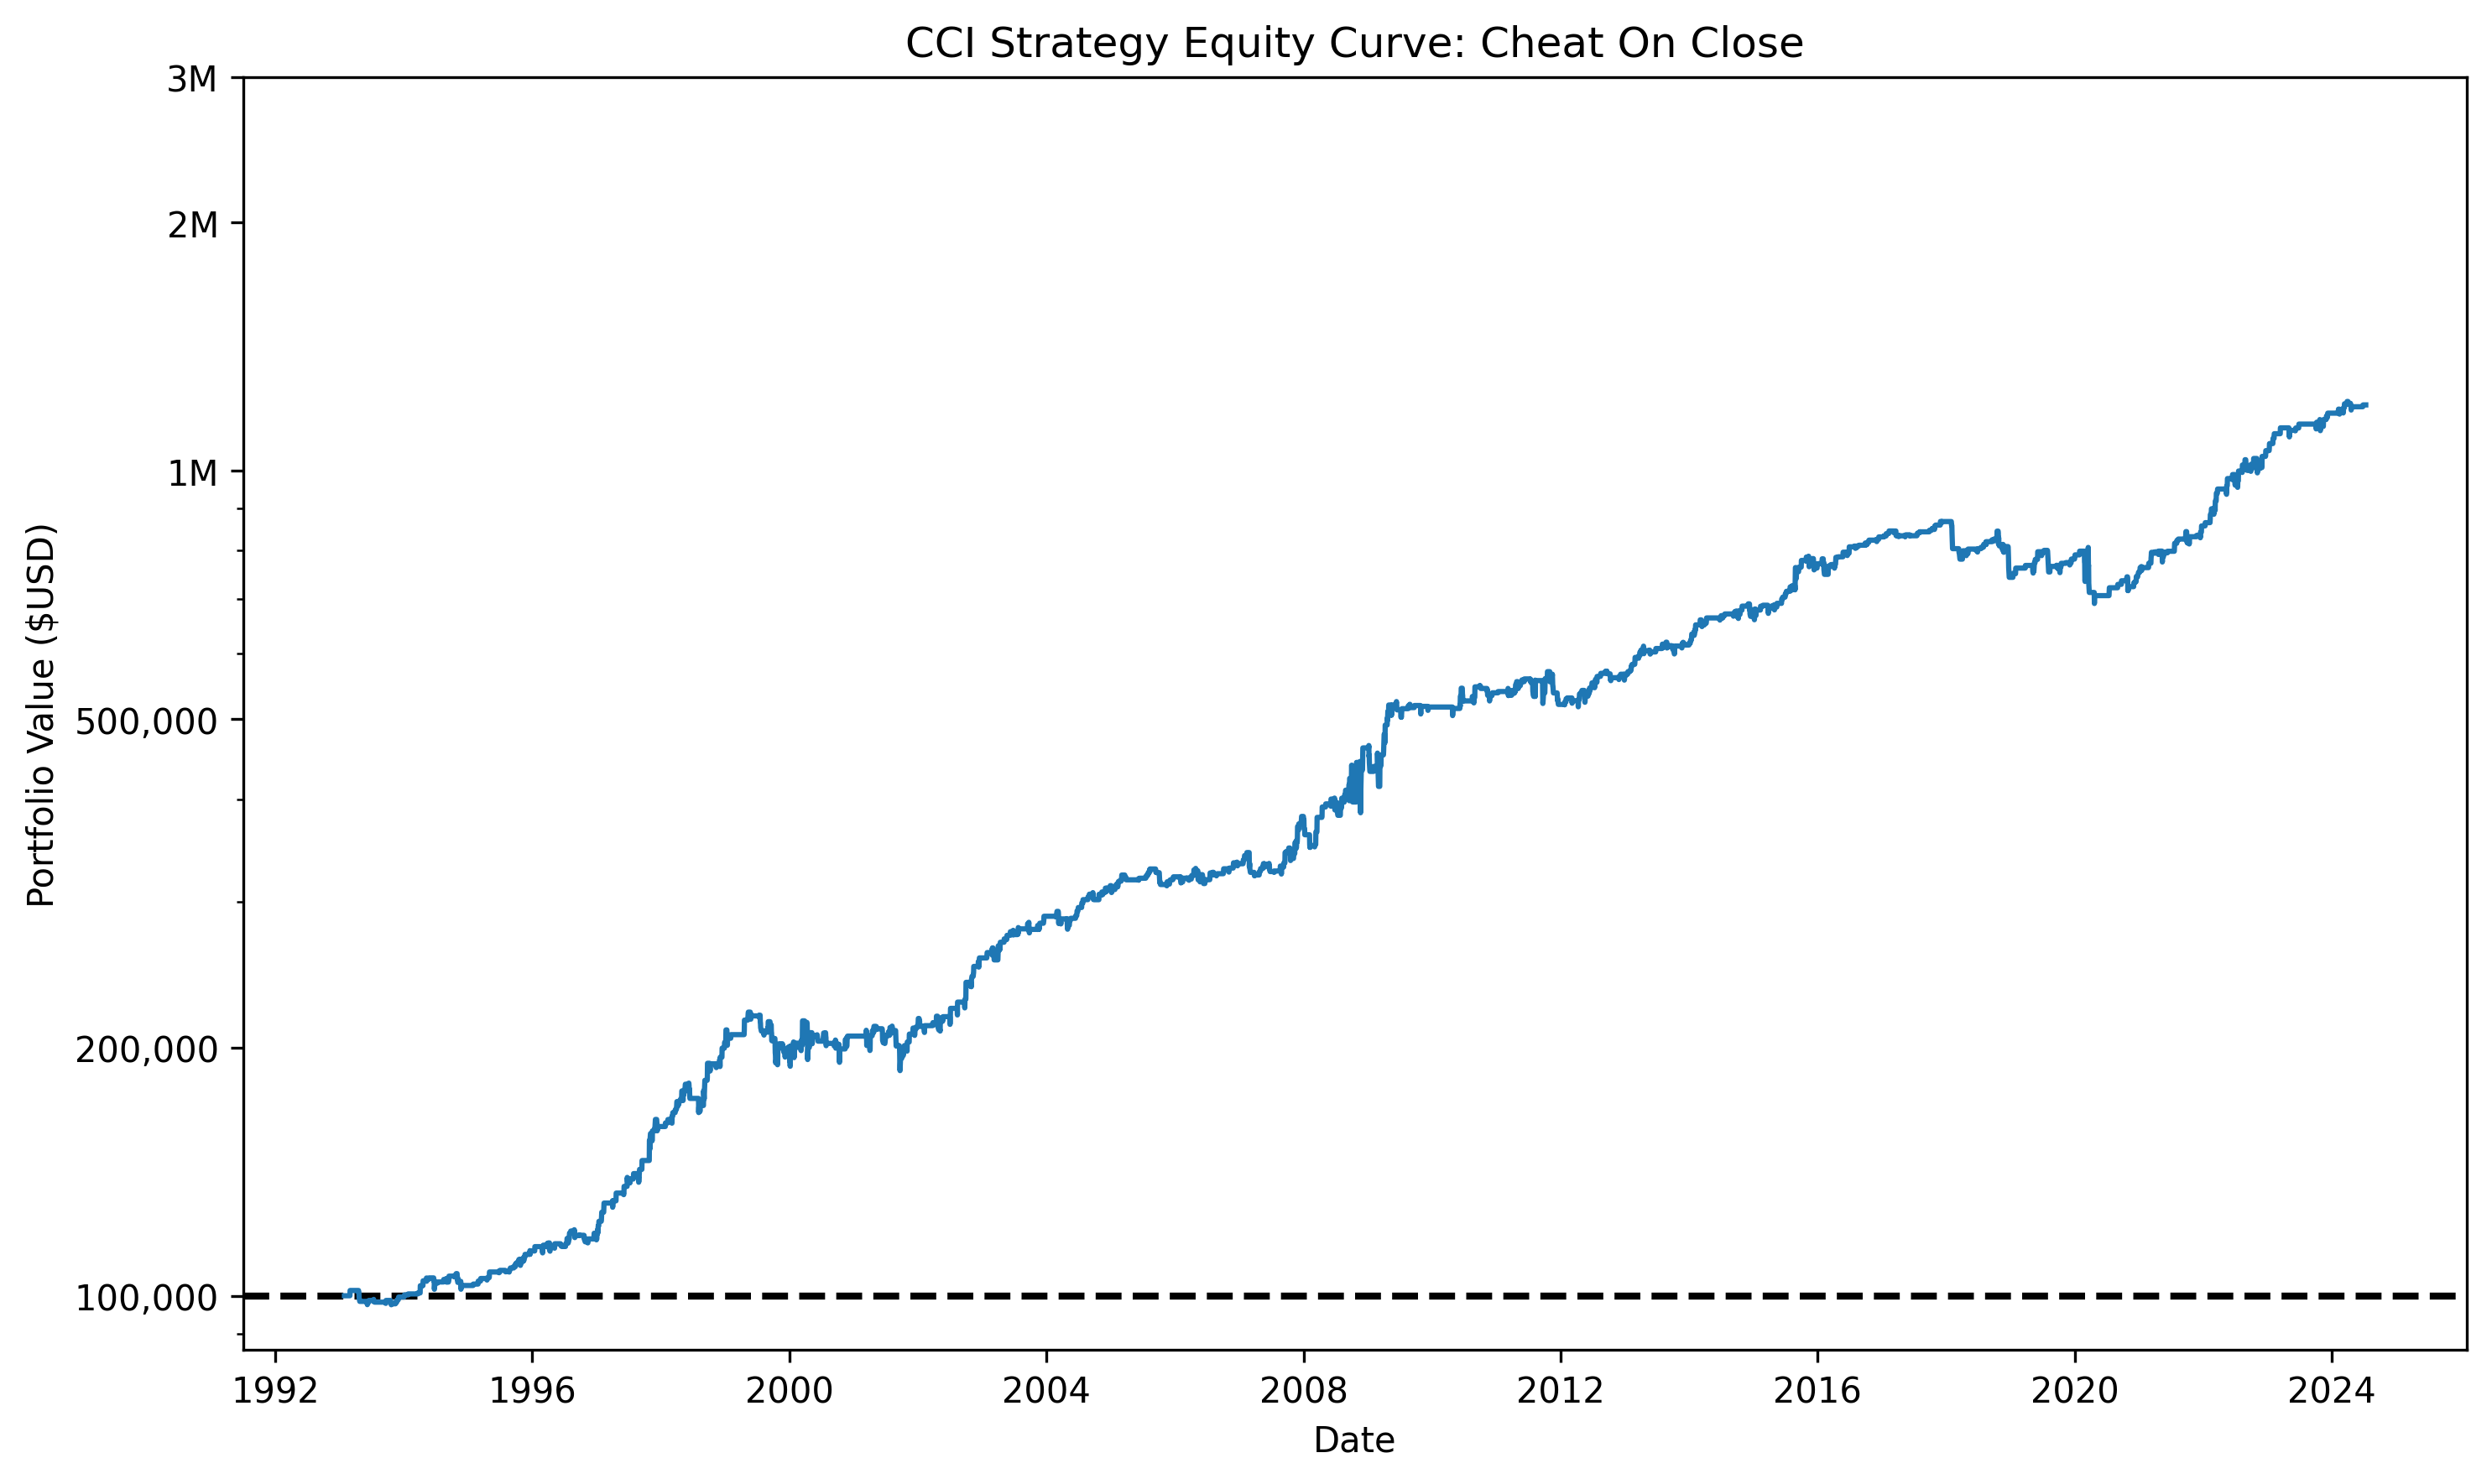

In [13]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"CCI Strategy Equity Curve: Cheat On Close")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()